In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np
import os
import cv2
print(tf.__version__)

2.2.0


In [2]:
dataset=keras.datasets.cifar10
(train_data,train_label),(test_data,test_label)=dataset.load_data()
print(len(train_data))
print(len(test_data))

50000
10000


In [3]:
train_data=train_data.reshape(50000, 32, 32, 3)
train_data=train_data / 255.0
test_data = test_data.reshape(10000, 32, 32, 3)
test_data=test_data/255.0

model=keras.models.Sequential([
                               keras.layers.Conv2D(8,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
                               keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'),
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                               keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
                              
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),padding='valid',activation='relu'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(512,(3,3),padding='valid',activation='relu'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                              
                               
                               
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=128,activation=tf.nn.relu),
                               
                               
                               keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)       2

In [4]:
history=model.fit(train_data,train_label,epochs=20)


Epoch 1/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6085 - accuracy: 0.4063
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0436 - accuracy: 0.6320
Epoch 3/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8066 - accuracy: 0.7188
Epoch 4/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6598 - accuracy: 0.7712
Epoch 5/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.5483 - accuracy: 0.8086
Epoch 6/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.4575 - accuracy: 0.8395
Epoch 7/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.3693 - accuracy: 0.8714
Epoch 8/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.3005 - accuracy: 0.8934
Epoch 9/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2608 - accuracy: 0.9078
Epoch 10/20
1563/1563 [==============================] - 24s 16m

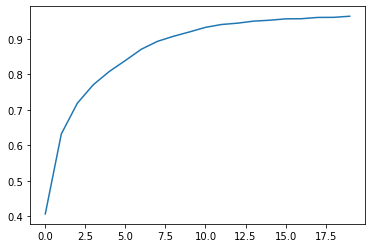

In [5]:
plt.plot(history.history['accuracy'])

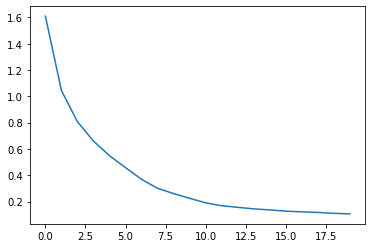

In [6]:
plt.plot(history.history['loss'])

In [7]:
test_loss, test_acc=model.evaluate(test_data, test_label)

313/313 [==============================] - 2s 6ms/step - loss: 1.3470 - accuracy: 0.7440
